# PACKAGES AND LIBRARIES

#### GENERAL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive

#### PATH

In [2]:
import os
import os.path
from pathlib import Path
import glob

#### IMAGE PROCESS

In [3]:
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### SCALER & TRANSFORMATION

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers

#### ACCURACY CONTROL

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

#### OPTIMIZER

In [6]:
from keras.optimizers import RMSprop,Adam,Optimizer

#### MODEL LAYERS

In [7]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19

#### IGNORING WARNINGS

In [8]:
from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

# PATH

In [9]:
drive.mount("/content/gdrive")
# Define the path to Google Drive "Data" folder
Brain_CT_Path = Path("/content/gdrive/MyDrive/DLprojectData")

Mounted at /content/gdrive


* file path is determined

In [10]:
JPG_Path = list(Brain_CT_Path.glob(r"**/*.jpg"))

* all images in the file path are assigned to a list

# LABEL

In [11]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))

* the categories of the images are separated

# TRANSFORMATION TO SERIES

In [12]:
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)

In [13]:
JPG_Labels_Series = pd.Series(JPG_Labels,name="CATEGORY")

* it is converted to Series structure before it is converted to DataFrame

# TRANSFORMATION TO DATAFRAME

In [14]:
Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)

* it is converted to DataFrame

In [15]:
print(Main_Data.head(-1))

                                                    JPG CATEGORY
0     /content/gdrive/MyDrive/DLprojectData/Hemorrha...   14[14]
1     /content/gdrive/MyDrive/DLprojectData/Hemorrha...   14[14]
2     /content/gdrive/MyDrive/DLprojectData/Hemorrha...   14[14]
3     /content/gdrive/MyDrive/DLprojectData/Hemorrha...   14[14]
4     /content/gdrive/MyDrive/DLprojectData/Hemorrha...   14[14]
...                                                 ...      ...
6766  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...   N6[N6]
6767  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...   N6[N6]
6768  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...   N6[N6]
6769  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...   N6[N6]
6770  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...   N6[N6]

[6771 rows x 2 columns]


#### REPLACING

In [16]:
Main_Data["CATEGORY"].replace({"11[11]":"Hemorrhage","11[11]":"Hemorrhage","12[12]":"Hemorrhage","13[13]":"Hemorrhage",
                               "14[14]":"Hemorrhage","15[15]":"Hemorrhage","17[17]__":"Hemorrhage",
                               "19[19]":"Hemorrhage","1[1]":"Hemorrhage","20[20]_2":"Hemorrhage",
                               "21[21] _2":"Hemorrhage","2[2]":"Hemorrhage","3[3]":"Hemorrhage","4[4]":"Hemorrhage","5[5]":"Hemorrhage",
                               "6[6]":"Hemorrhage","7[7]":"Hemorrhage","8[8]":"Hemorrhage","9[9]":"Hemorrhage"},inplace=True)

In [17]:
Main_Data["CATEGORY"].replace({"N10[N10]":"Normal","N11[N11]":"Normal","N12[N12]":"Normal","N13[N13]":"Normal","N14[N14]":"Normal",
                               "N15[N15]":"Normal","N15[N15]":"Normal",
                               "N16[N16]":"Normal","N17[N17]":"Normal","N18[N18]":"Normal",
                               "N19[N19]":"Normal","N1[N1]":"Normal","N20[N20]":"Normal","N21[N21]":"Normal",
                               "N22[N22]":"Normal","N23[N23]":"Normal","N24[N24]":"Normal",
                               "N25[N25]":"Normal","N26[N26]":"Normal","N27[N27]":"Normal","N2[N2]":"Normal",
                               "N3[N3]":"Normal","N4[N4]":"Normal","N5[N5]":"Normal",
                               "N6[N6]":"Normal","N7[N7]":"Normal","N8[N8]":"Normal","N9[N9]":"Normal"},inplace=True)

* we have to change the names because the categories in the data are complex

In [18]:
print(Main_Data.head(-1))

                                                    JPG    CATEGORY
0     /content/gdrive/MyDrive/DLprojectData/Hemorrha...  Hemorrhage
1     /content/gdrive/MyDrive/DLprojectData/Hemorrha...  Hemorrhage
2     /content/gdrive/MyDrive/DLprojectData/Hemorrha...  Hemorrhage
3     /content/gdrive/MyDrive/DLprojectData/Hemorrha...  Hemorrhage
4     /content/gdrive/MyDrive/DLprojectData/Hemorrha...  Hemorrhage
...                                                 ...         ...
6766  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
6767  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
6768  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
6769  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
6770  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal

[6771 rows x 2 columns]


In [19]:
print(Main_Data["CATEGORY"].value_counts())

Normal        4105
Hemorrhage    2667
Name: CATEGORY, dtype: int64


# SHUFFLING

In [20]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

* we have to mix the data to increase the success of the model and maintain its objectivity.

In [21]:
print(Main_Data.head(-1))

                                                    JPG    CATEGORY
0     /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
1     /content/gdrive/MyDrive/DLprojectData/Hemorrha...  Hemorrhage
2     /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
3     /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
4     /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
...                                                 ...         ...
6766  /content/gdrive/MyDrive/DLprojectData/Hemorrha...  Hemorrhage
6767  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
6768  /content/gdrive/MyDrive/DLprojectData/Hemorrha...  Hemorrhage
6769  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
6770  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal

[6771 rows x 2 columns]


# VISUALIZATION

In [22]:
plt.style.use('dark_background')

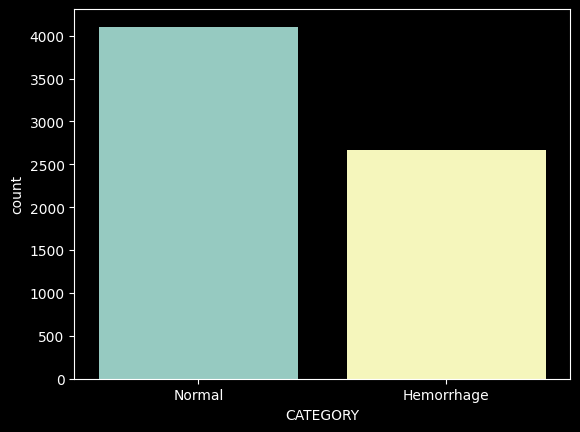

In [23]:
sns.countplot(x="CATEGORY", data=Main_Data)
plt.show()

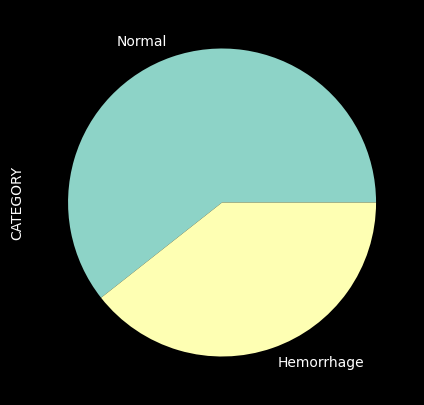

In [24]:
Main_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

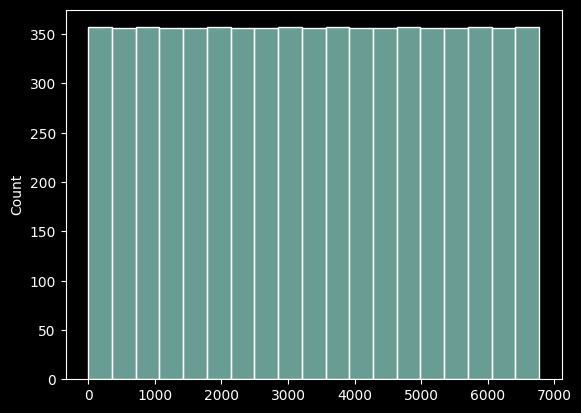

In [25]:
sns.histplot(Main_Data['CATEGORY'].index)
plt.show()

Text(0.5, 1.0, 'Normal')

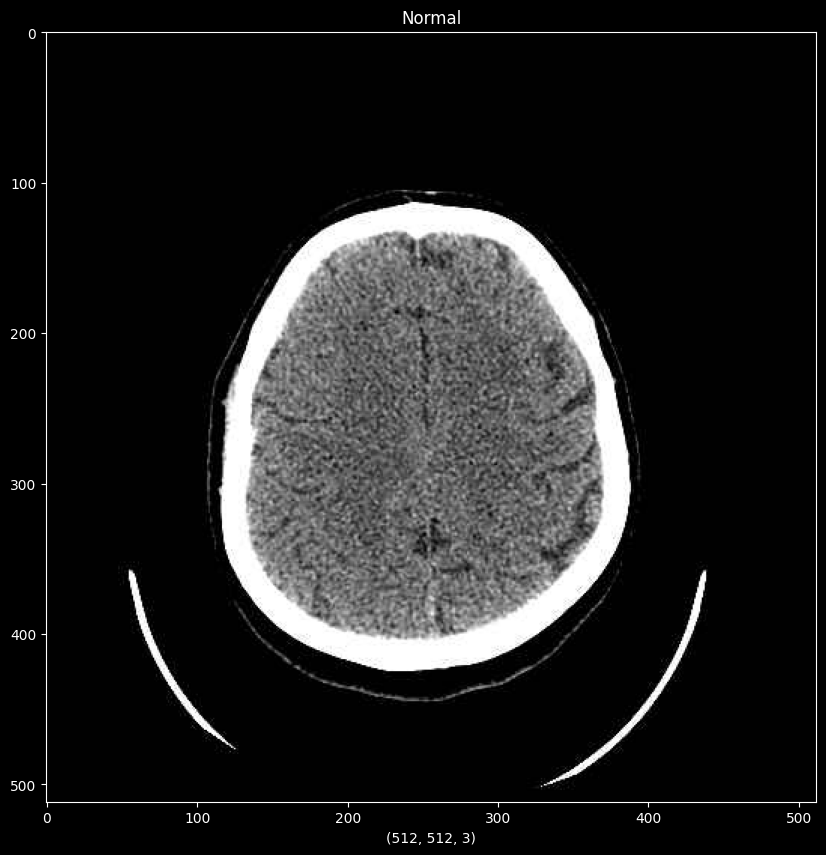

In [26]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][0])

Text(0.5, 1.0, 'Normal')

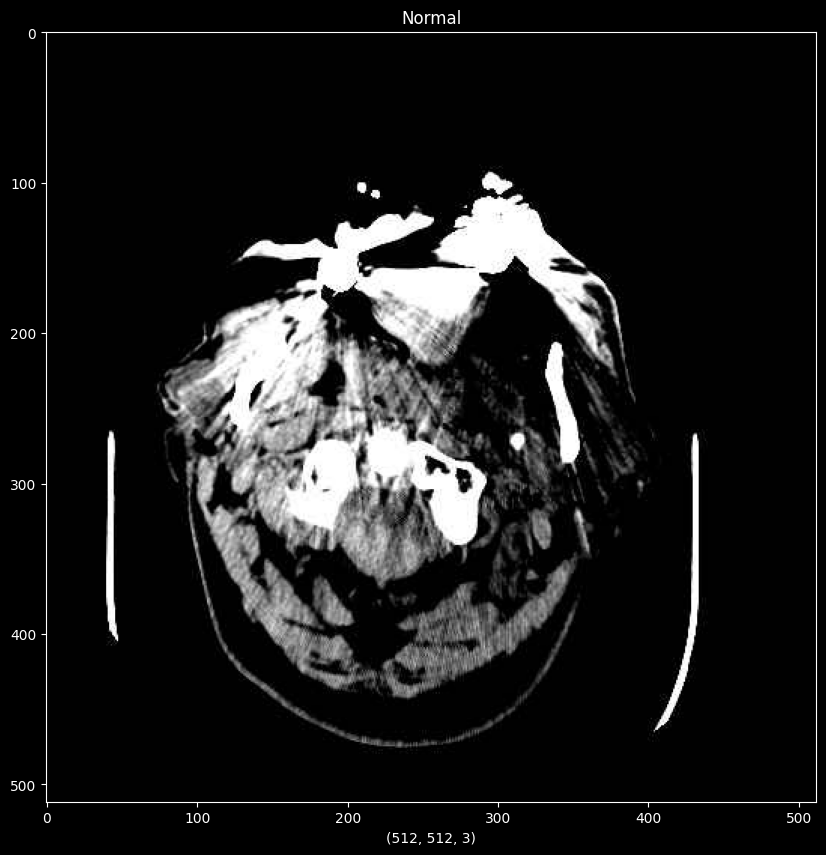

In [27]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][25])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][6769])

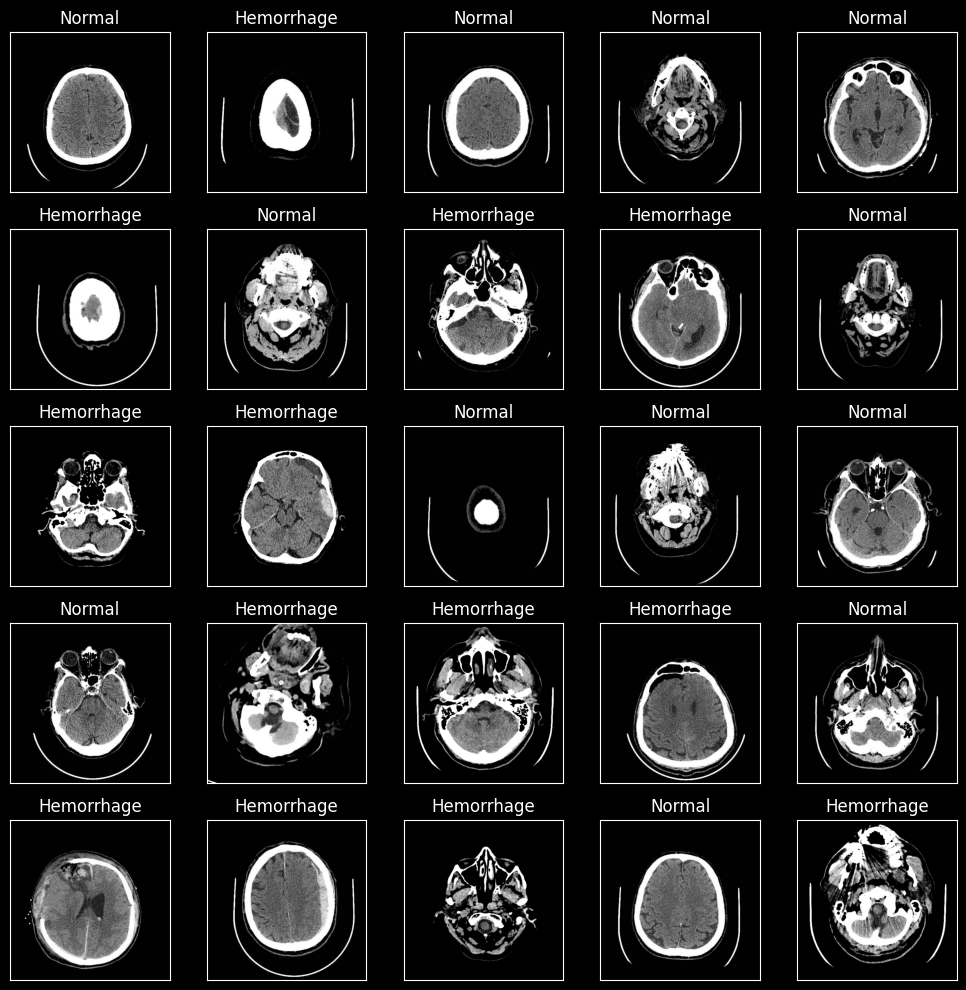

In [28]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# DETERMINATION TRAIN AND TEST DATA

In [29]:
Train_Data,Test_Data = train_test_split(Main_Data,train_size=0.9,shuffle=True,random_state=42)

* we divided it into test and training set
* we set the shuffle parameter to True for training quality
* we told it to use the same data as random state

In [30]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (6094, 2)
TEST SHAPE:  (678, 2)


In [31]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                                    JPG    CATEGORY
318   /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
4941  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
4251  /content/gdrive/MyDrive/DLprojectData/Hemorrha...  Hemorrhage
5787  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
4999  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
...                                                 ...         ...
3092  /content/gdrive/MyDrive/DLprojectData/Hemorrha...  Hemorrhage
3772  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
5191  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal
5226  /content/gdrive/MyDrive/DLprojectData/Hemorrha...  Hemorrhage
5390  /content/gdrive/MyDrive/DLprojectData/NORMAL/N...      Normal

[6093 rows x 2 columns]
--------------------------------------------------------------------------------
                                                    JPG    CATEGORY
2689  /con

# IMAGE GENERATOR

In [32]:
Generator = ImageDataGenerator(rescale=1./255,
                               zoom_range=0.2,
                              shear_range=0.2,
                              rotation_range=40,
                              horizontal_flip=True,
                               fill_mode="nearest",
                              validation_split=0.1)

* we used diversification so that the model does not shift to the overfitting orientation

In [33]:
Test_Generator = ImageDataGenerator(rescale=1./255)

* we don't need diversification for test data, we will use it as it is

#### How Generator Applied Image Look Like

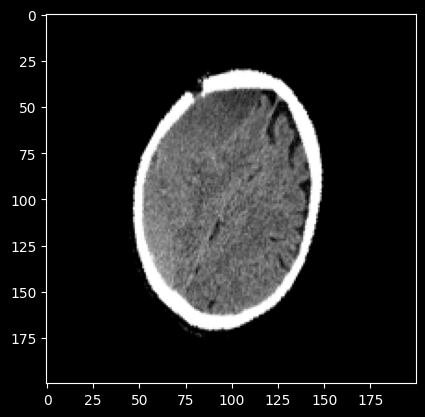

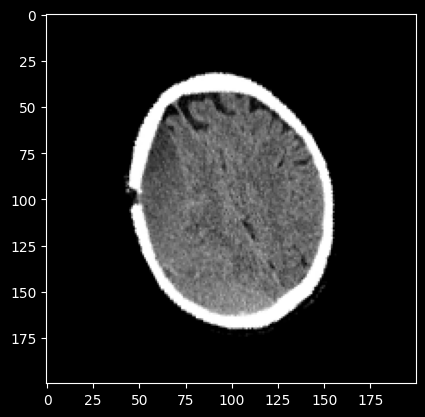

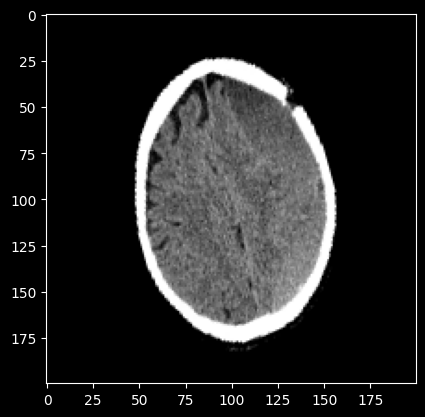

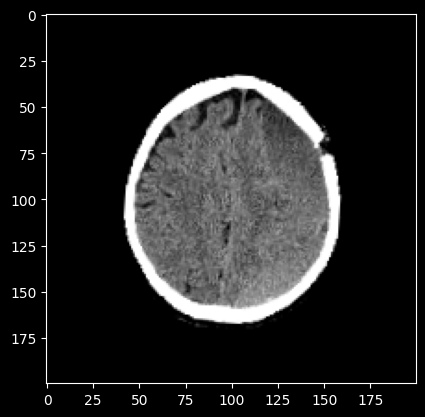

In [34]:
example_Image = Train_Data["JPG"][99]
Load_Image = image.load_img(example_Image,target_size=(200,200))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### APPLYING GENERATOR AND TRANSFORMATION TO TENSOR

In [35]:
Train_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                             color_mode="grayscale",
                                             class_mode="categorical",
                                             subset="training")

Found 5485 validated image filenames belonging to 2 classes.


In [36]:
Validation_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                                  x_col="JPG",
                                                  y_col="CATEGORY",
                                                  color_mode="grayscale",
                                                  class_mode="categorical",
                                                  subset="validation")

Found 609 validated image filenames belonging to 2 classes.


In [37]:
Test_IMG_Set = Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="JPG",
                                                 y_col="CATEGORY",
                                                 color_mode="grayscale",
                                                 class_mode="categorical")

Found 678 validated image filenames belonging to 2 classes.


#### CHECKING

In [38]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 1)
LABEL SHAPE:  (32, 2)


In [39]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 1)
LABEL SHAPE:  (32, 2)


In [40]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")

TRAIN: 
{'Hemorrhage': 0, 'Normal': 1}
[0, 1, 1, 1, 1]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'Hemorrhage': 0, 'Normal': 1}
[1, 1, 0, 1, 1]
(256, 256, 1)
------------------------------------------------------------
TEST: 


In [41]:
print(Test_IMG_Set.batch_size)
print(Test_IMG_Set.image_shape)

32
(256, 256, 1)


# CNN STRUCTURE WITH LSTM / RCNN

In [42]:
Model = Sequential()

Model.add(Conv2D(12,(3,3),activation="relu",
                 input_shape=(256,256,1)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(24,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))


#
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))
Model.add(Bidirectional(GRU(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))

#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(2,activation="softmax"))

* LSTM and GRU are iterative layers

* LSTM and GRU serve to inject past information into the future, thereby reducing the gradient destruction problem

* we used LSTM and GRU layers both with fully-connetted layers and Conv2D
* RCNN structure is created in this way
* we determined the LSTM and GRU layers as bidirectional

* less problem of gradient disappearance in LSTM and GRU

* we used it with Dropout so that the model does not shift to overfitting orientation
* we made return_success True because we wanted each process to generate output separately

* we also used dropout within the GRU and LSTM layers to prevent the model from shifting to the overfitting orientation
* recurrent_dropout means transmission damping ratio of iterative layers

Loss Function We Used:


![](https://gombru.github.io/assets/cross_entropy_loss/intro.png)

* Activation Function:

![](http://rasbt.github.io/mlxtend/user_guide/general_concepts/activation-functions_files/activation-functions.png)

In [43]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")

* we wanted the training of the model to stop where the loss value is minimal

In [44]:
Model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [46]:
CNN_Model = Model.fit(Train_IMG_Set,
                      validation_data=Validation_IMG_Set,
                            callbacks=Call_Back,
                      epochs=1)

172/172 [==============================] - 1330s 8s/step - loss: 0.6772 - accuracy: 0.5965 - val_loss: 0.6551 - val_accuracy: 0.6289


#### CHECKING

In [47]:
Model_Results = Model.evaluate(Test_IMG_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.6420
ACCURACY:  0.63


In [48]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 12)      120       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 12)      48        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 12)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 24)      2616      
                                                                 
 dropout (Dropout)           (None, 127, 127, 24)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 24)        0

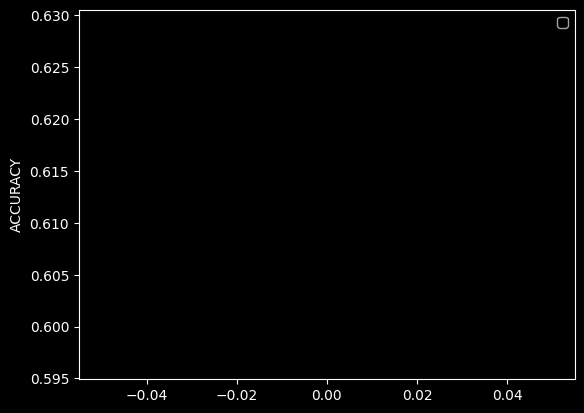

In [49]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

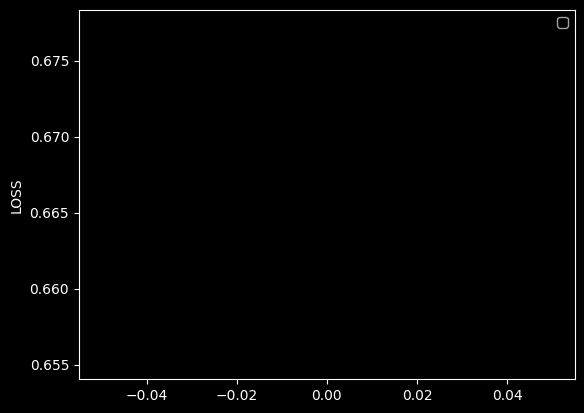

In [50]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

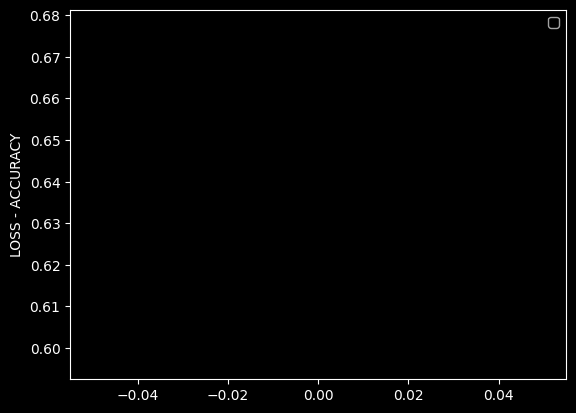

In [51]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["accuracy"])
plt.ylabel("LOSS - ACCURACY")
plt.legend()
plt.show()

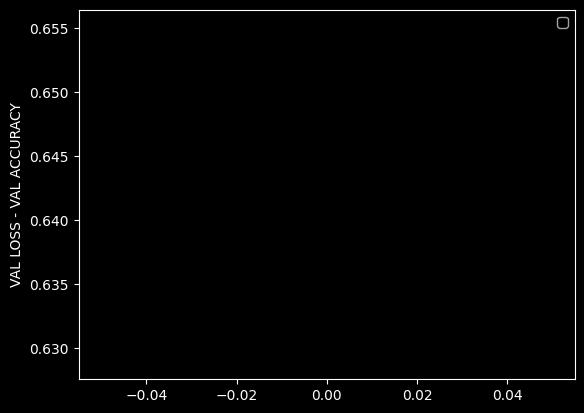

In [52]:
plt.plot(CNN_Model.history["val_loss"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("VAL LOSS - VAL ACCURACY")
plt.legend()
plt.show()

<Axes: >

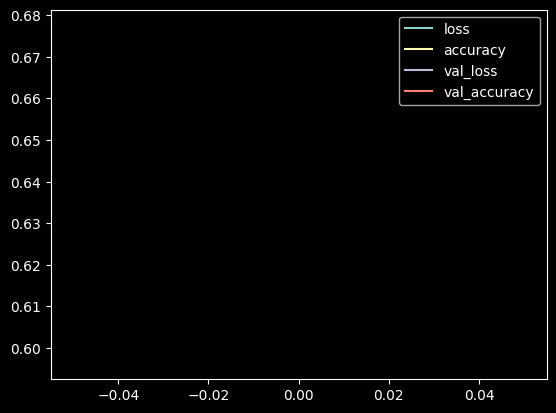

In [53]:
Dict_Summary = pd.DataFrame(CNN_Model.history)
Dict_Summary.plot()


#### PREDICTION

In [54]:
Prediction = Model.predict(Test_IMG_Set)
Prediction = Prediction.argmax(axis=-1)

22/22 [==============================] - 22s 930ms/step


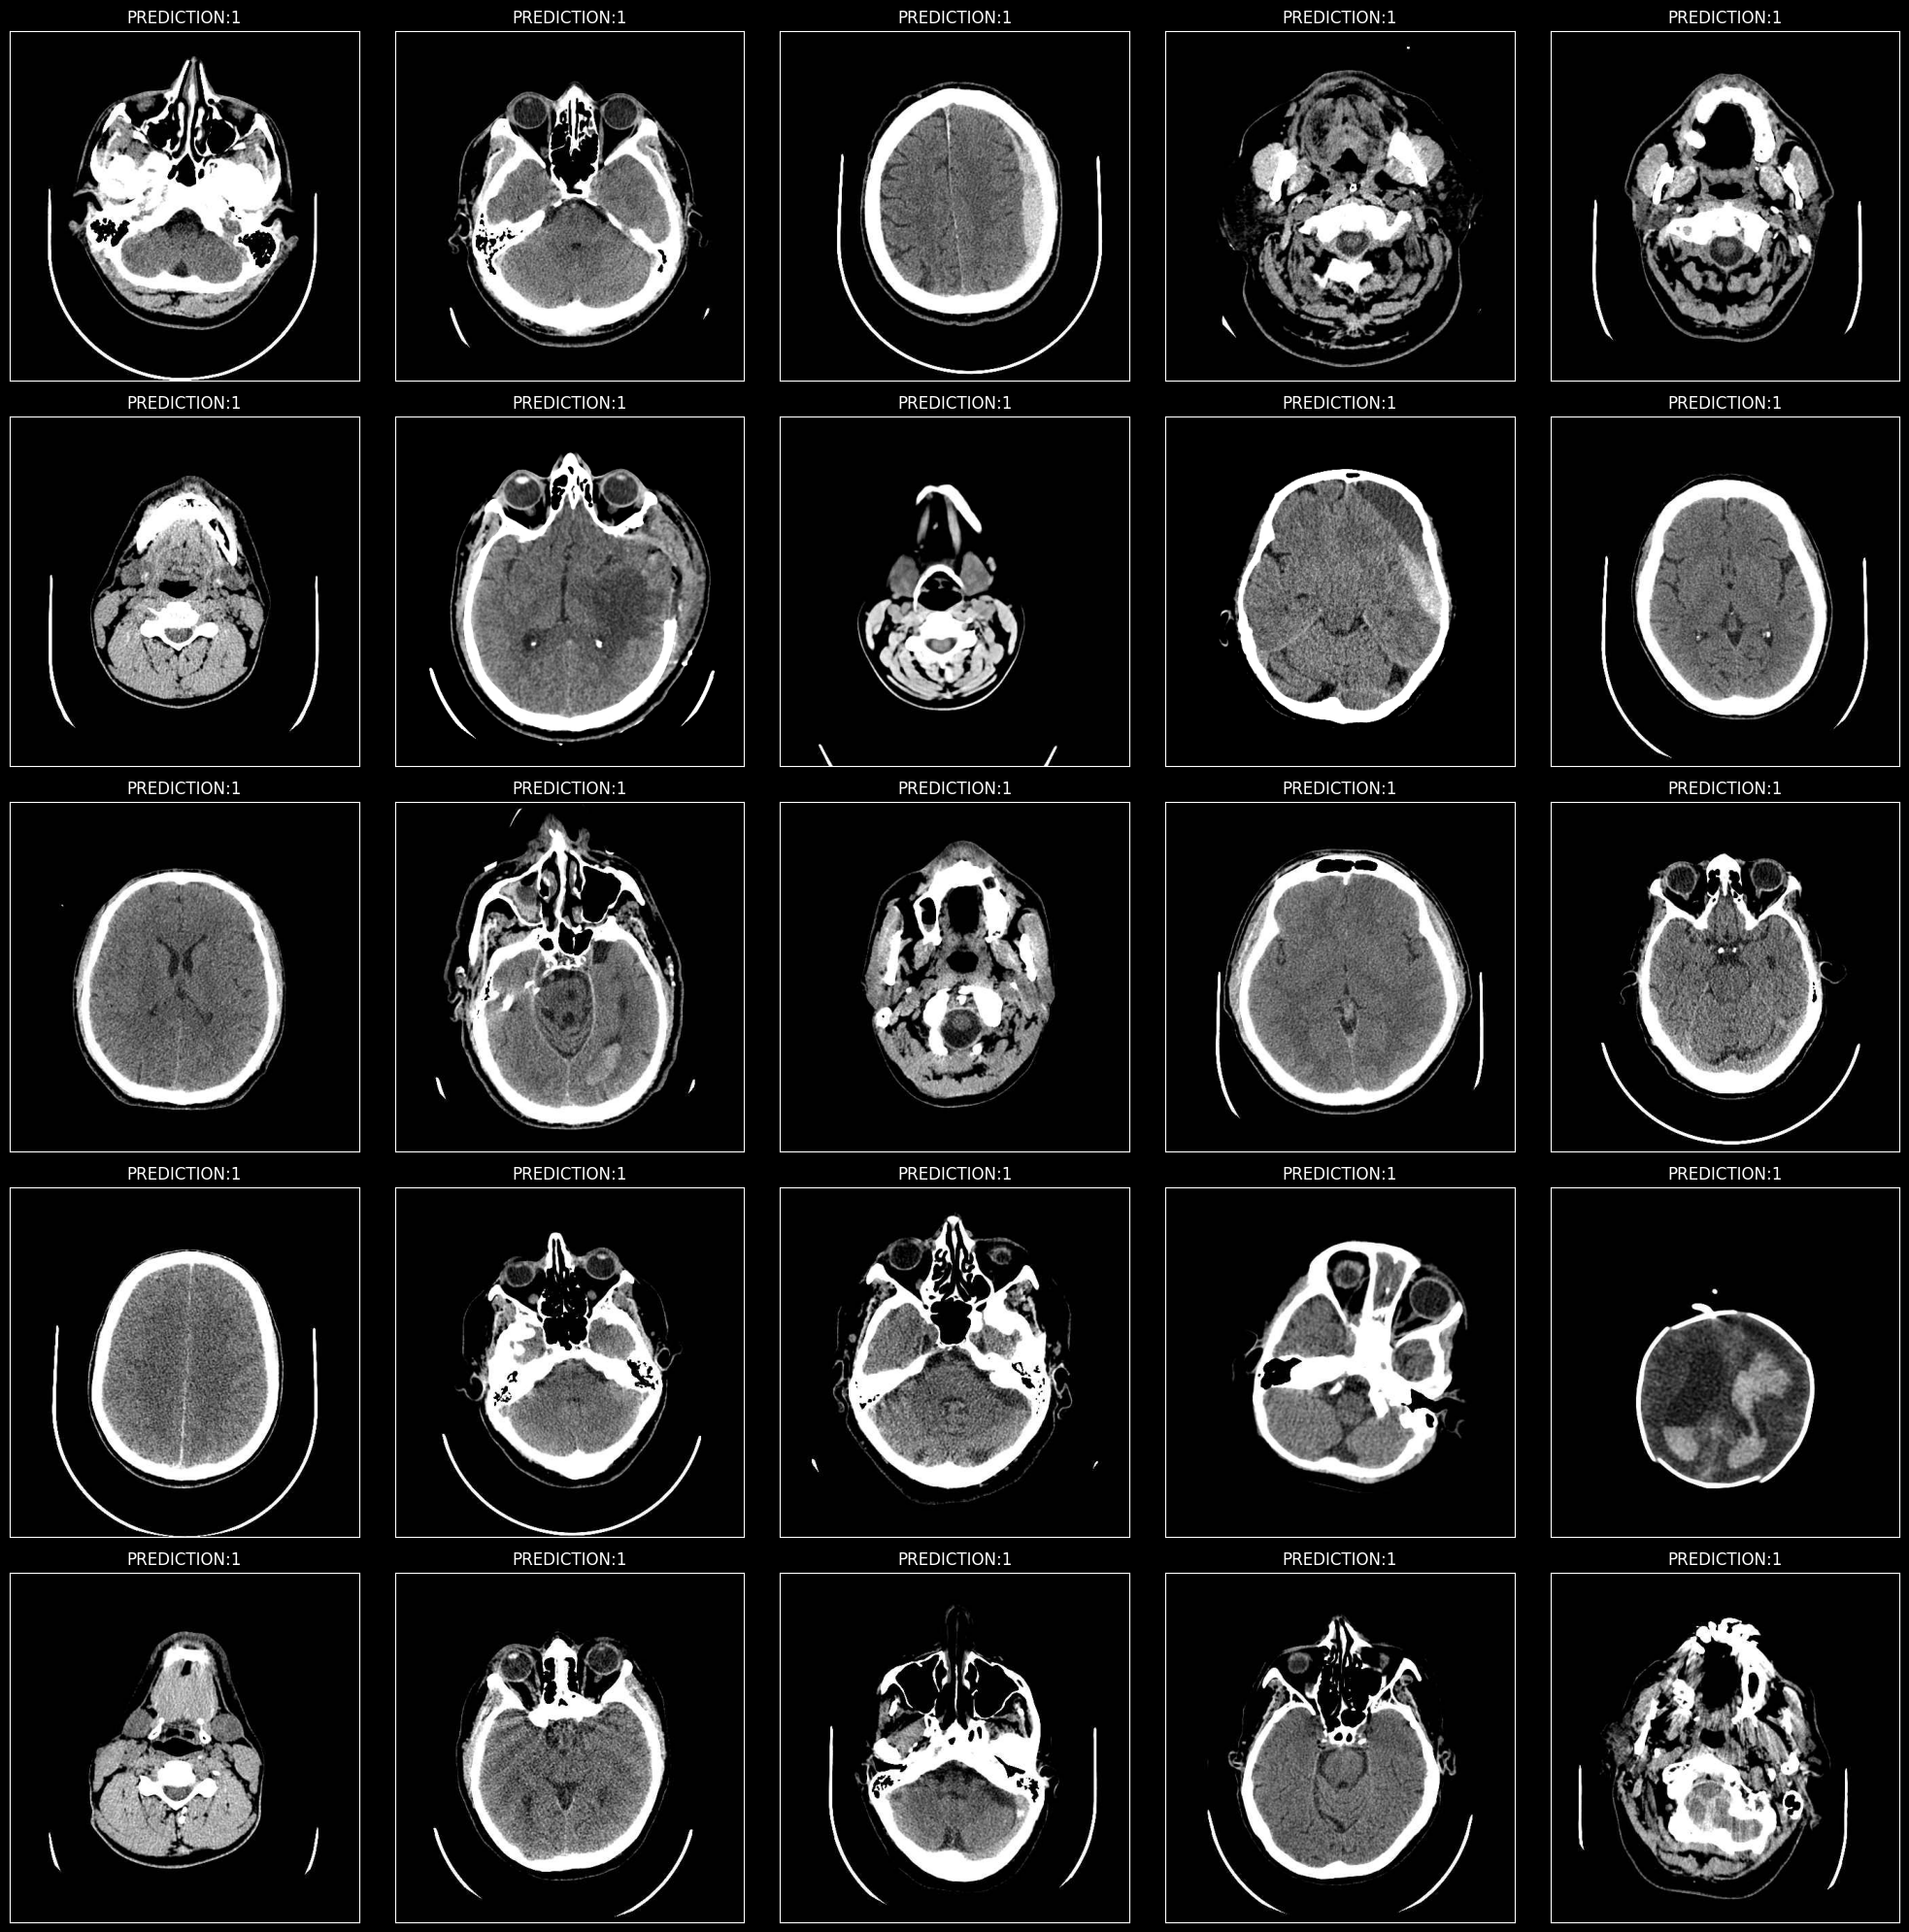

In [55]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Test_Data["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Prediction[i]}")
plt.tight_layout()
plt.show()